# Heart catheterization: Good or bad?

This notebook illustrates how analyze heart catheterization using regression analysis Python with Pandas.
Original dataset available at: http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets (search for rhs, download csv file for data, html file for file description)
For a presentation and key results on the topic, see: http://www.mc.vanderbilt.edu/crc/workshop_files/2008-04-11.pdf

## Import key modules

In [1]:
from __future__ import division
import pandas as pd
from pandas import DataFrame, Series
from collections import Counter
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Import data to a dataframe (called df)

In [2]:
df = pd.read_excel('heart.xls')
#df = pd.read_excel('https://dl.dropboxusercontent.com/u/116175/rhc3.xls')

## Have a look at the data

In [3]:
df.head(5)

,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,chfhx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


## Clean the Data

In [3]:
df.replace(to_replace = 'Yes', value = 1, inplace = 'True')
df.replace(to_replace = 'No', value = 0, inplace = 'True')

df.swang1.replace('No RHC', 0, 'True')
df.swang1.replace('RHC', 1, 'True')

df.sex.replace('Male', 0, 'True')
df.sex.replace('Female', 1, 'True')

In [4]:
df.head()

,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,chfhx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
1,COPD,NaN,1,11142,11151.0,NaN,11382,0,0,0,...,0,0,0,0,0,0.0,NaN,white,Under $11k,5
2,MOSF w/Sepsis,NaN,0,11799,11844.0,11844.0,11844,1,1,1,...,0,0,1,0,0,NaN,1437.0,white,Under $11k,7
3,MOSF w/Malignancy,MOSF w/Sepsis,1,12083,12143.0,NaN,12400,0,0,0,...,0,0,0,0,0,NaN,599.0,white,$25-$50k,9
4,ARF,NaN,0,11146,11183.0,11183.0,11182,1,0,0,...,0,0,0,0,0,NaN,NaN,white,$11-$25k,10
5,MOSF w/Sepsis,NaN,0,12035,12037.0,12037.0,12036,1,0,0,...,0,0,0,0,0,NaN,64.0,white,Under $11k,11


In [5]:
df.swang1

1       0
2       1
3       1
4       0
5       1
6       0
7       0
8       0
9       0
10      1
11      0
12      1
13      1
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      1
22      1
23      1
24      0
25      0
26      1
27      0
28      0
29      0
30      0
       ..
5706    0
5707    0
5708    0
5709    0
5710    1
5711    1
5712    1
5713    0
5714    1
5715    1
5716    0
5717    0
5718    0
5719    0
5720    1
5721    0
5722    1
5723    1
5724    0
5725    0
5726    1
5727    0
5728    0
5729    1
5730    0
5731    0
5732    0
5733    0
5734    0
5735    0
Name: swang1, dtype: int64

In [7]:
df.groupby('swang1')['death'].mean()

swang1
0    0.629682
1    0.680403
Name: death, dtype: float64

In [8]:
df.groupby('swang1')['death'].describe().unstack(level=0)

swang1,0,1
count,3551.000000,2184.000000
mean,0.629682,0.680403
std,0.482958,0.466427
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [9]:
df.columns


Index([u'cat1', u'cat2', u'ca', u'sadmdte', u'dschdte', u'dthdte', u'lstctdte', u'death', u'cardiohx', u'chfhx', u'dementhx', u'psychhx', u'chrpulhx', u'renalhx', u'liverhx', u'gibledhx', u'malighx', u'immunhx', u'transhx', u'amihx', u'age', u'sex', u'edu', u'surv2md1', u'das2d3pc', u't3d30', u'dth30', u'aps1', u'scoma1', u'meanbp1', u'wblc1', u'hrt1', u'resp1', u'temp1', u'pafi1', u'alb1', u'hema1', u'bili1', u'crea1', u'sod1', u'pot1', u'paco21', u'ph1', u'swang1', u'wtkilo1', u'dnr1', u'ninsclas', u'resp', u'card', u'neuro', u'gastr', u'renal', u'meta', u'hema', u'seps', u'trauma', u'ortho', u'adld3p', u'urin1', u'race', u'income', u'ptid'], dtype='object')

## Run regression

In [10]:
outcome = df.death
renameVars = {'swang1': 'rhc'}
df.rename(columns = renameVars, inplace = True)
vars = ['age', 'sex', 'edu', 'rhc']

olsResult = sm.OLS(outcome, df[vars]).fit()
print (olsResult.params)


age    0.008125
sex   -0.012853
edu    0.010540
rhc    0.067150
dtype: float64


In [11]:
print (olsResult.summary())


                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2829.
Date:                Wed, 09 Nov 2016   Prob (F-statistic):               0.00
Time:                        02:30:58   Log-Likelihood:                -3772.0
No. Observations:                5735   AIC:                             7552.
Df Residuals:                    5731   BIC:                             7579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
age            0.0081      0.000     31.665      0.0

In [59]:
outcome = df.death
renameVars = {'swang1': 'rhc'}
df.rename(columns = renameVars, inplace = True)
vars = ['age', 'sex', 'edu', 'rhc']

logitResult = sm.Logit(outcome, df[vars]).fit()
print logitResult.summary()

Optimization terminated successfully.
         Current function value: 0.627138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  death   No. Observations:                 5735
Model:                          Logit   Df Residuals:                     5731
Method:                           MLE   Df Model:                            3
Date:                Mon, 03 Nov 2014   Pseudo R-squ.:                 0.03229
Time:                        13:37:21   Log-Likelihood:                -3596.6
converged:                       True   LL-Null:                       -3716.7
                                        LLR p-value:                 9.368e-52
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
age            0.0192      0.001     15.885      0.000         0.017     0.022
sex           -0.1585      0.

## Estimate propensity score

In [17]:
vars = ['age', 'sex', 'edu']


In [25]:
treated = df.swang1

logit = sm.Logit(treated, df[vars])
 
# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.663312
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 swang1   No. Observations:                 5735
Model:                          Logit   Df Residuals:                     5732
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Nov 2014   Pseudo R-squ.:                0.001734
Time:                        13:09:21   Log-Likelihood:                -3804.1
converged:                       True   LL-Null:                       -3810.7
                                        LLR p-value:                  0.001351
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
age           -0.0070      0.001     -6.190      0.000        -0.009    -0.005
sex           -0.2098      0.

swang1
0         Axes(0.125,0.125;0.775x0.775)
1         Axes(0.125,0.125;0.775x0.775)
Name: propensity, dtype: object

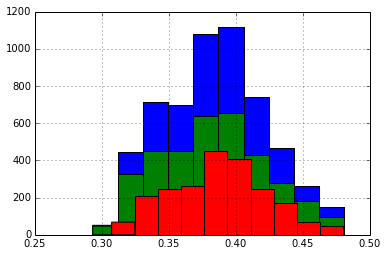

In [26]:
df['propensity'] = result.predict()
df.propensity.hist()
df.groupby('swang1')['propensity'].hist()

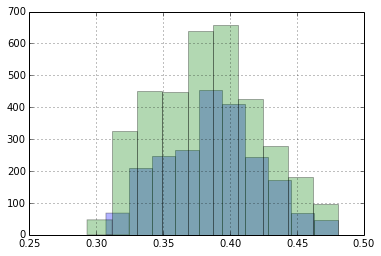

In [44]:
df.propensity[df.swang1 == 1].hist(alpha=0.3)
df.propensity[df.swang1 == 0].hist(alpha=0.3)

In [42]:
df.swang1.value_counts()

0    3551
1    2184
dtype: int64

In [60]:
predictions

array([ 0.39179338,  0.33073467,  0.38401837, ...,  0.37982433,
        0.39657505,  0.36797422])

In [45]:
bins = np.linspace(df.propensity.min(), df.propensity.max(), 5)
groups = df.groupby(np.digitize(df.propensity, bins))

In [46]:
groups['death'].mean()

1    0.722892
2    0.689320
3    0.629769
4    0.474110
5    1.000000
Name: death, dtype: float64

In [47]:
groups = df.groupby(['swang1',np.digitize(df.propensity, bins)])

In [48]:
groups['death'].mean()

swang1   
0       1    0.707904
        2    0.669173
        3    0.609149
        4    0.443878
        5    1.000000
1       1    0.758065
        2    0.721489
        3    0.659065
        4    0.526549
Name: death, dtype: float64

In [49]:
groups['death'].mean().unstack(level=0)

swang1,0,1
1,0.707904,0.758065
2,0.669173,0.721489
3,0.609149,0.659065
4,0.443878,0.526549
5,1.000000,NaN


In [50]:
groups['death'].size().unstack(level=0)

swang1,0,1
1,582,248
2,1330,833
3,1246,877
4,392,226
5,1,NaN


In [51]:
psTable = groups['death'].mean().unstack(level=0)
psTable

swang1,0,1
1,0.707904,0.758065
2,0.669173,0.721489
3,0.609149,0.659065
4,0.443878,0.526549
5,1.000000,NaN


In [52]:
psTable.columns = ['untreated', 'treated']

In [53]:
psTable['difference'] = psTable.treated - psTable.untreated

In [55]:
psTable.tail(5)

,untreated,treated,difference
1,0.707904,0.758065,0.050161
2,0.669173,0.721489,0.052316
3,0.609149,0.659065,0.049916
4,0.443878,0.526549,0.082671
5,1.000000,NaN,NaN


In [56]:
psTable.difference.mean()

0.058765809330939417